**exercises with statsmodels OLS and WLS**
*created by fbb November 2018*


In [23]:
from __future__ import print_function, division
import pylab as pl
import numpy as np

import os
import json

import statsmodels.api as sm
import statsmodels.formula.api as smf
#s = json.load( open(os.getenv('PUI2018')+"/fbb_matplotlibrc.json") )
#pl.rcParams.update(s)

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [9]:
def errors(x):
    return np.sqrt(x)
    

def line(a, x, b=0, errors=None):

    '''
    creates a line from parameters and exogenous variable
    a: slope
    x: exogenous variable
    b: intercept - default 0
    errors: add uncertainties (sqrt(N) - default True)
    '''
    np.random.randn(123)
    if errors is None:
        return a*x + b 
    else:
        return a*x + b + np.random.randn(len(x)) * errors(x)
    


# 1. create a line with a chosen slope and intercept = 0 and plot it with uncertainties as errorbars

use the functions created above

In [10]:
def errors(x):
    return np.sqrt(x)
    

def line(a, x, b=0, errors=None):
    '''
    creates a line from parameters and exogenous variable
    a: slope
    x: exogenous variable
    b: intercept - default 0
    errors: add uncertainties (sqrt(N) - default True)
    '''
    np.random.randn(123)
    if errors is None:
        return a*x + b 
    else:
        return a*x + b + np.random.randn(len(x)) * errors(x)

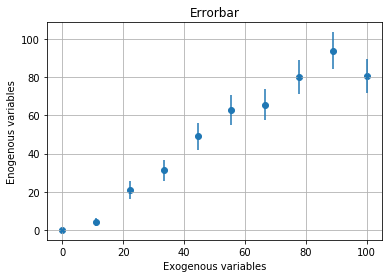

In [19]:
x = np.linspace(0,100,10)
y = line(1 ,x , 0, errors=errors)

plt.scatter(x,y,label="random points")
plt.errorbar(x,y, yerr = errors(y), fmt='.')
plt.xlabel("Exogenous variables")
plt.ylabel("Enogenous variables")
plt.title("Errorbar")
plt.grid()

# 2. print y, x, and the result of applying statsmodels.api.add_constant() to x

In [20]:
x

array([   0.        ,   11.11111111,   22.22222222,   33.33333333,
         44.44444444,   55.55555556,   66.66666667,   77.77777778,
         88.88888889,  100.        ])

In [21]:
y

array([  0.        ,   4.00370302,  20.8046589 ,  31.20246437,
        49.12364541,  62.7311408 ,  65.48832124,  80.11526545,
        93.86421419,  80.46974575])

In [25]:
sm.add_constant(x)

array([[   1.        ,    0.        ],
       [   1.        ,   11.11111111],
       [   1.        ,   22.22222222],
       [   1.        ,   33.33333333],
       [   1.        ,   44.44444444],
       [   1.        ,   55.55555556],
       [   1.        ,   66.66666667],
       [   1.        ,   77.77777778],
       [   1.        ,   88.88888889],
       [   1.        ,  100.        ]])

# 3. use statsmodels.api.OLS to fit x and y 
- a. *the wrong way*: by passing x as exogenous variable
- b. *the right way*: by passing statsmodels.api.add_constant(x) as exogenous variable

# and print the model summary for each and discuss the differences

In [31]:
#THE WRONG WAY
smfit = smf.OLS(y, x).fit()
smfit.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     579.8
Date:                Fri, 16 Nov 2018   Prob (F-statistic):           1.76e-09
Time:                        10:43:14   Log-Likelihood:                -33.908
No. Observations:                  10   AIC:                             69.82
Df Residuals:                       9   BIC:                             70.12
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.9721      0.040     24.080      0.000         0.881     1.063
==============================================================================
Omnibus:                        5.177   Durbin-Watson:                   1.578
Prob(Omnibus):                  0.075   Jarque-Bera (JB):                1.964
Skew:                          -1.053   Prob(JB):                        0.375
Kurtosis:                       3.527   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
smfit_right= smf.OLS(y,sm.add_constant(x)).fit()
smfit_right.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     146.9
Date:                Fri, 16 Nov 2018   Prob (F-statistic):           1.99e-06
Time:                        10:43:15   Log-Likelihood:                -33.897
No. Observations:                  10   AIC:                             71.79
Df Residuals:                       8   BIC:                             72.40
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.6093      4.716      0.129      0.900       -10.265    11.484
x1             0.9634      0.079     12.119      0.000         0.780     1.147
==============================================================================
Omnibus:                        4.042   Durbin-Watson:                   1.575
Prob(Omnibus):                  0.132   Jarque-Bera (JB):                1.540
Skew:                          -0.951   Prob(JB):                        0.463
Kurtosis:                       3.280   Cond. No.                         110.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 4. plot the data (as points) and both statsmodels fits

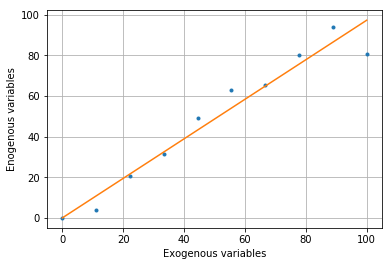

In [37]:
plt.plot(x,y,'.')
pl.plot(x,smfit.fittedvalues, '-' )
plt.xlabel("Exogenous variables",fontsize=10)
plt.ylabel("Enogenous variables",fontsize=10)
plt.grid()

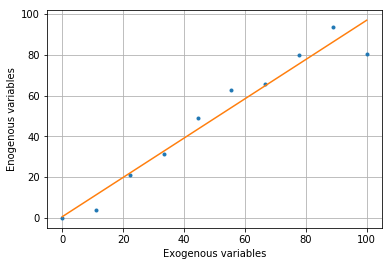

In [38]:
plt.plot(x,y,'.')
pl.plot(x,smfit_right.fittedvalues, '-' )
plt.xlabel("Exogenous variables",fontsize=10)
plt.ylabel("Enogenous variables",fontsize=10)
plt.grid()

# 5. create a line with a chosen slope and a chosen intercept >=100*slope and plot it with uncertainties as errorbars

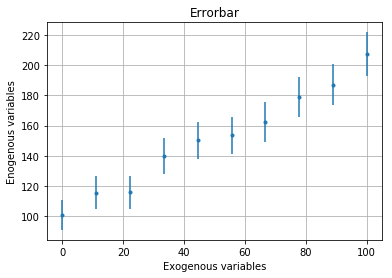

In [41]:
x = np.linspace(0,100,10)
y1 = line(1 ,x , 101, errors=errors)

#plt.scatter(x,y1,label="random points")
plt.errorbar(x,y1, yerr = errors(y), fmt='.')
plt.xlabel("Exogenous variables")
plt.ylabel("Enogenous variables")
plt.title("Errorbar")
plt.grid()

# 6. repeat step 3

In [42]:
smfit_new= smf.OLS(y1,sm.add_constant(x)).fit()
smfit_right.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     146.9
Date:                Fri, 16 Nov 2018   Prob (F-statistic):           1.99e-06
Time:                        10:50:41   Log-Likelihood:                -33.897
No. Observations:                  10   AIC:                             71.79
Df Residuals:                       8   BIC:                             72.40
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.6093      4.716      0.129      0.900       -10.265    11.484
x1             0.9634      0.079     12.119      0.000         0.780     1.147
==============================================================================
Omnibus:                        4.042   Durbin-Watson:                   1.575
Prob(Omnibus):                  0.132   Jarque-Bera (JB):                1.540
Skew:                          -0.951   Prob(JB):                        0.463
Kurtosis:                       3.280   Cond. No.                         110.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

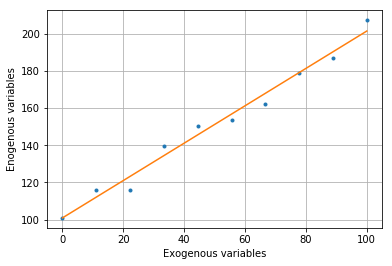

In [43]:
plt.plot(x,y1,'.')
pl.plot(x,smfit_new.fittedvalues, '-' )
plt.xlabel("Exogenous variables",fontsize=10)
plt.ylabel("Enogenous variables",fontsize=10)
plt.grid()

# 7. now fit the data with WLS weighted least square, a linear fit that takes into account the uncertainties by "down-weighting" (considering less important) observations with large uncertainties

you should at this point ask: how can I create weights from my uncertainties? The answer, as often is the case, is not unique. But a rule of thumb is that the weights would be the _inverse_ (remember: larger error must mean smaller weight) of the variance, with is the standard deviation square. Look at the error() function I create and design your weights array according to this rule

In [58]:
weight = 1.0 /errors(x)
weight[weight == inf] = 0 
weight

array([ 0.        ,  0.3       ,  0.21213203,  0.17320508,  0.15      ,
        0.13416408,  0.12247449,  0.11338934,  0.10606602,  0.1       ])

In [59]:
WLS = smf.WLS(y1, sm.add_constant(x),weights = weight).fit()
WLS.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.972
Model:                            WLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     279.0
Date:                Fri, 16 Nov 2018   Prob (F-statistic):           1.67e-07
Time:                        11:31:29   Log-Likelihood:                   -inf
No. Observations:                  10   AIC:                               inf
Df Residuals:                       8   BIC:                               inf
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        101.6494      3.211     31.655      0.000        94.245   109.054
x1             0.9936      0.059     16.703      0.000         0.856     1.131
==============================================================================
Omnibus:                        0.790   Durbin-Watson:                   2.597
Prob(Omnibus):                  0.674   Jarque-Bera (JB):                0.667
Skew:                          -0.490   Prob(JB):                        0.717
Kurtosis:                       2.201   Cond. No.                         101.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Note: you can also use other statsmodels functions, for example statsmodels.formula.api which allows to pass an equation
again, make sure that your formula supports an intercept (no deliverable for this portion, it's up to you to explore the use of this function)

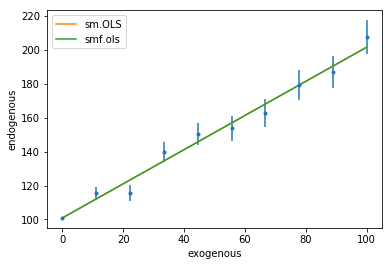

In [69]:
# statsmodels.formula.api accepts dictionaris, pandas dataframes, and python rec arrays as input: 
# all data types that host data paired with labels
smfmodel = smf.ols('y ~ x + const', data={'x':x, 'y':y1, 'const':np.ones(len(x))}).fit()
pl.errorbar(x, y1, yerr=errors(x), fmt='.')
pl.plot(x, smfit_new.fittedvalues, '-', label="sm.OLS")
pl.plot(x, smfmodel.fittedvalues, '-', label="smf.ols")
pl.xlabel("exogenous")
pl.ylabel("endogenous")
pl.legend();